## Tải bộ dữ liệu

In [18]:
!pip install ucimlrepo

## Import thư viện

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Load bộ dữ liệu

In [20]:
# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

X

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b


## Mô tả và phân tích dữ liệu

In [21]:
X.describe() # Mô tả bộ dữ liệu

,A15,A14,A11,A8,A3,A2
count,690.000000,677.000000,690.00000,690.000000,690.000000,678.000000
mean,1017.385507,184.014771,2.40000,2.223406,4.758725,31.568171
std,5210.102598,173.806768,4.86294,3.346513,4.978163,11.957862
min,0.000000,0.000000,0.00000,0.000000,0.000000,13.750000
25%,0.000000,75.000000,0.00000,0.165000,1.000000,22.602500
50%,5.000000,160.000000,0.00000,1.000000,2.750000,28.460000
75%,395.500000,276.000000,3.00000,2.625000,7.207500,38.230000
max,100000.000000,2000.000000,67.00000,28.500000,28.000000,80.250000


- Thông tin dữ liệu

In [22]:
X.info() # Thông tin bộ dữ liệu tập X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.0+ KB


In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A16     690 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


## Xử lý dữ liệu

- Xóa cột A14 do cột này là zip code

In [24]:
X = X.drop(['A14'], axis=1) # Hàm drop để xóa cột

- Thay đổi cột A2 thành số

In [25]:
X['A2'] = pd.to_numeric(X['A2'], errors='coerce') # Hàm to_numeric thực hiện chuyển đổi giá trị từ object sang số

- Thay thế các dòng dấu '?' sang Null

In [26]:
X = X.replace('?', np.nan) # Hàm replace thực hiện thay đổi giá trị

X.head(5)

,A15,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b


- Gán các giá trị còn thiếu bằng cách tính giá trị trung bình

In [27]:
X.fillna(X.mean(numeric_only=True) , inplace=True) # Hàm fillna thực hiện thay thế giá trị Nall bằng 1 giá trị phù hợp, trường hợp này là giá trị mean
X.isnull().sum() # Kiểm tra dữ liệu còn Null không

A15     0
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2      0
A1     12
dtype: int64

In [28]:
for col in X.columns:
    if X[col].dtypes == 'object': # Thực hiện fill Null với những cột là Object
        X = X.fillna(X[col].value_counts().index[0])

print(X.isnull().sum())

A15    0
A13    0
A12    0
A11    0
A10    0
A9     0
A8     0
A7     0
A6     0
A5     0
A4     0
A3     0
A2     0
A1     0
dtype: int64


- Thực hiện preprocessing

In [29]:
X['A1'] = X['A1'].apply(lambda x: 0 if x=='a' else 1) # Thực hiện đổi các giá trị object, nếu 'a' chuyển thành 0 , ngược lại thì 1
X['A9'] = X['A9'].apply(lambda x: 0 if x=='t' else 1) # Chuyển 't' thành 0, ngước lại thành 1
X['A10'] = X['A10'].apply(lambda x: 0 if x=='t' else 1) # Chuyển 't' thành 0, ngước lại thành 1
X['A12'] = X['A12'].apply(lambda x: 0 if x=='t' else 1) # Chuyển 't' thành 0, ngước lại thành 1
y['A16'] = y['A16'].apply(lambda x: 0 if x=='+' else 1) # Chuyển '+' thành 0, ngước lại thành 1

X = pd.get_dummies(X) # Thực hiện tạo biến giả, chuyển các hàng có giá trị object sang các cột, như hình dưới
X.head(5)

,A15,A12,A11,A10,A9,A8,A3,A2,A1,A13_g,...,A6_r,A6_w,A6_x,A5_g,A5_gg,A5_p,A4_g,A4_l,A4_u,A4_y
0,0,1,1,0,0,1.25,0.000,30.83,1,True,...,False,True,False,True,False,False,False,False,True,False
1,560,1,6,0,0,3.04,4.460,58.67,0,True,...,False,False,False,True,False,False,False,False,True,False
2,824,1,0,1,0,1.50,0.500,24.50,0,True,...,False,False,False,True,False,False,False,False,True,False
3,3,0,5,0,0,3.75,1.540,27.83,1,True,...,False,True,False,True,False,False,False,False,True,False
4,0,1,0,1,0,1.71,5.625,20.17,1,False,...,False,True,False,True,False,False,False,False,True,False


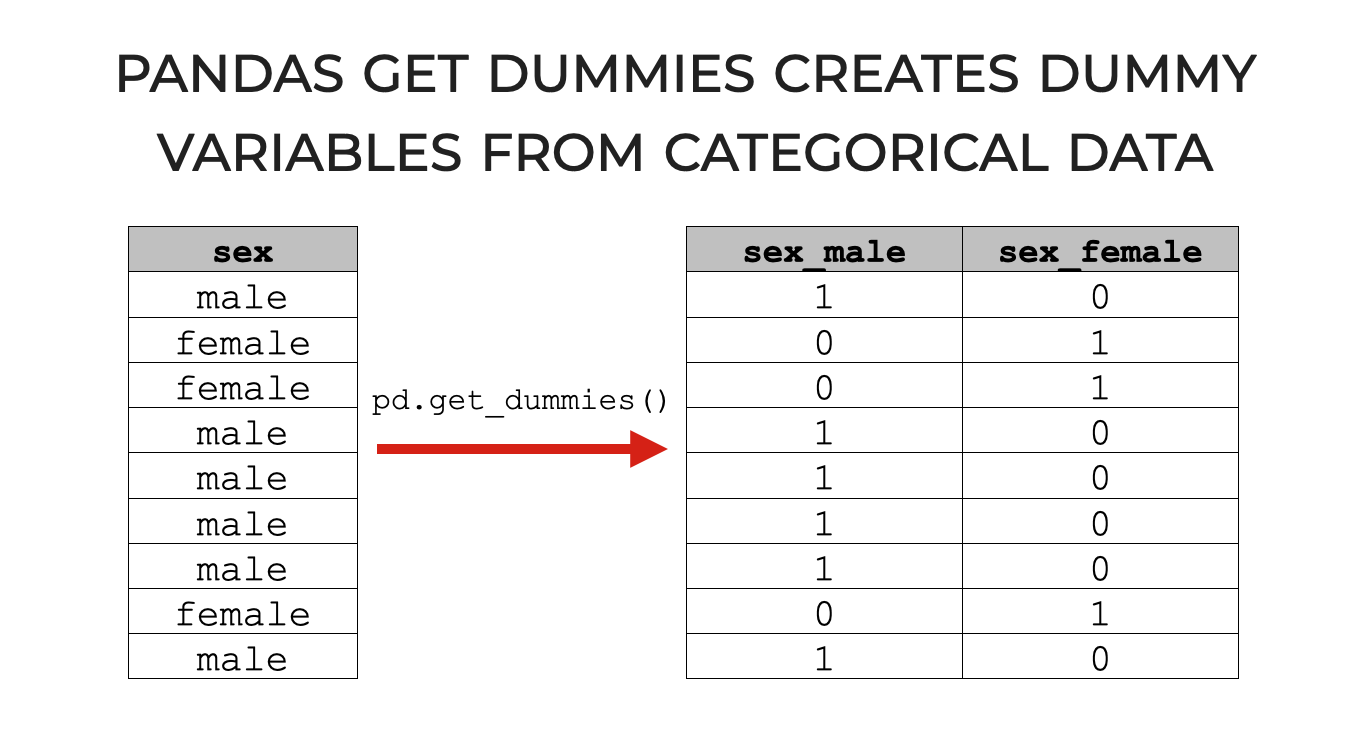

## Phân tách dữ liệu

In [30]:
# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42) # train_test_split thực hiện phân chia dữ liệu X, y với tỉ lệ 20% cho tập test

- Chuẩn hóa dữ liệu

In [31]:
scaler = MinMaxScaler() # Sử dụng hàm MinMaxScaler để chuẩn hóa dữ liệu về giá trị 0-1
rescaledX_train = scaler.fit_transform(X_train) # Áp dụng MinMaxScaler cho tập X_train
rescaledX_test = scaler.transform(X_test) # Áp dụng MinMaxScaler cho tập X_test

## Xây dựng mô hình cây quyết định để dự đoán

- Sử dụng mô hình Decision Tree

In [32]:
clf = DecisionTreeClassifier() # Gọi tới mô hình DecisionTreeClassifier
clf = clf.fit(X_train, y_train) # Train Decision Tree classifier

- Dự đoán trên tập test và in ra ma trận nhầm lẫn

In [33]:
y_pred = clf.predict(rescaledX_test) # Dự đoán trên tập X_test

- Đánh giá mô hình

In [37]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred) # Độ đo accuracy_score
precision = precision_score(y_test, y_pred, average='macro') # Độ đo precision_score
recall = recall_score(y_test, y_pred, average='macro') # Độ đo recall_score
f1 = f1_score(y_test, y_pred, average='macro') # Độ đo f1_score
conf_matrix = confusion_matrix(y_test, y_pred) # Độ đo confusion_matrix

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.793859649122807
Precision: 0.7920168067226891
Recall: 0.7914951456310679
F1 Score: 0.7917403556505684
Confusion Matrix:
 [[ 79  24]
 [ 23 102]]


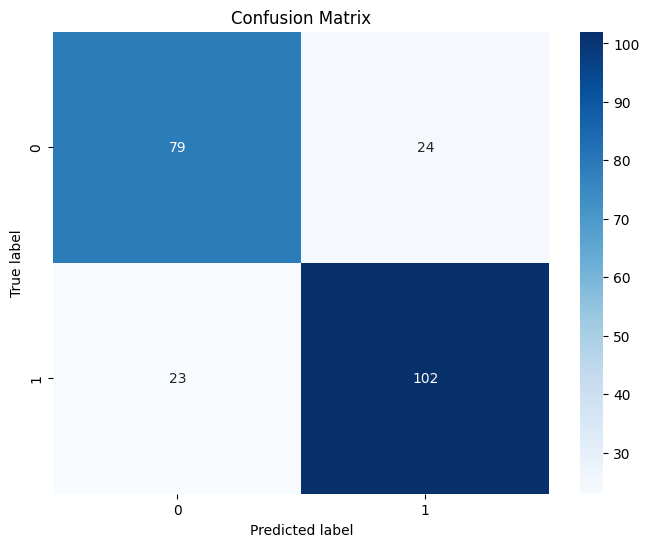

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()